In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [73]:
df.shape

(506, 14)

In [74]:
df.dtypes

Crime_rate    float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
Age           float64
Distance      float64
rad             int64
tax             int64
ptratio       float64
b             float64
lstat         float64
medv          float64
dtype: object

In [75]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [76]:
df['rm'] = df['rm'].fillna(df['rm'].mean())
df.isnull().any().sum()

0

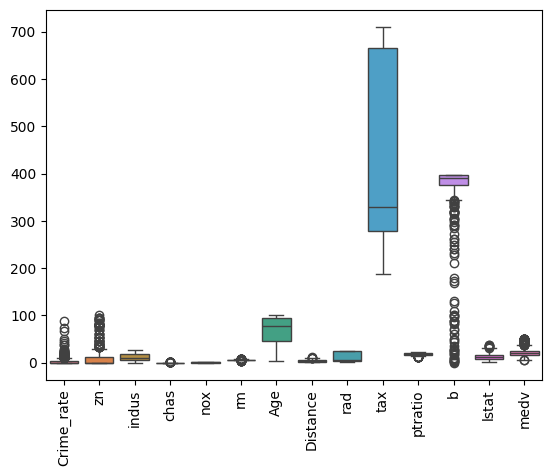

In [77]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [78]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

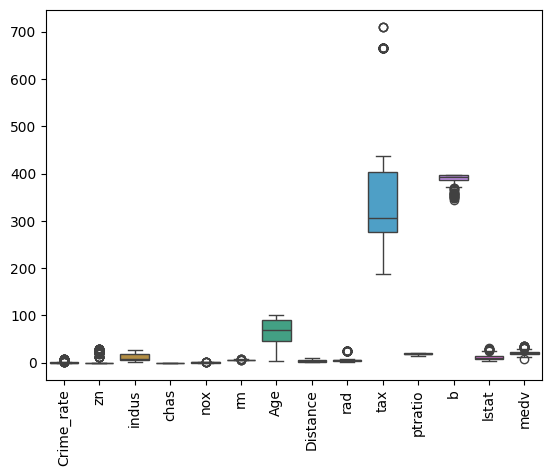

In [79]:
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.show()

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

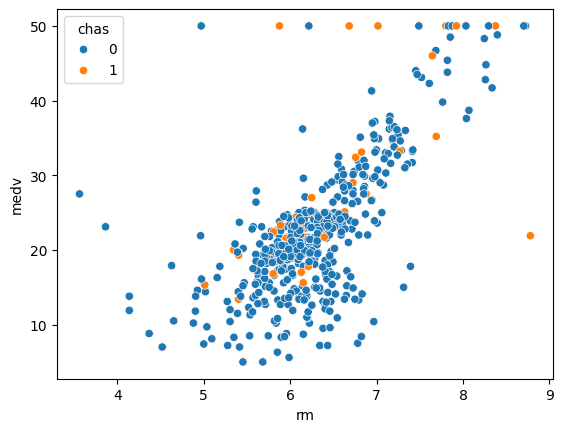

In [81]:
sns.scatterplot(x='rm',y='medv',hue='chas',data=df)
plt.show()

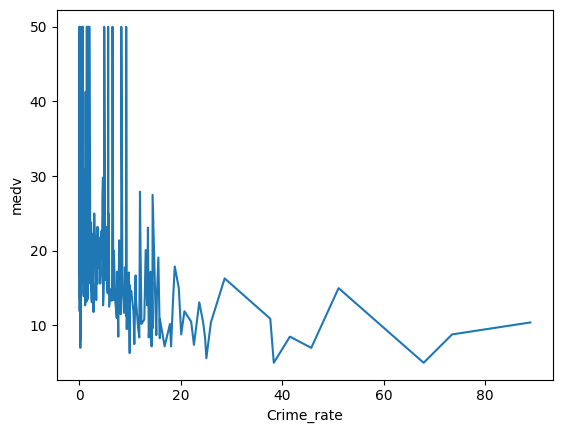

In [82]:
sns.lineplot(x='Crime_rate',y='medv',data=df)
plt.show()

In [83]:
correlation_matrix = df.corr()
correlation_with_medv = correlation_matrix['medv']
print(correlation_with_medv)

Crime_rate   -0.388305
zn            0.360445
indus        -0.483725
chas          0.175260
nox          -0.427321
rm            0.695375
Age          -0.376955
Distance      0.249929
rad          -0.381626
tax          -0.468536
ptratio      -0.507787
b             0.333461
lstat        -0.737663
medv          1.000000
Name: medv, dtype: float64


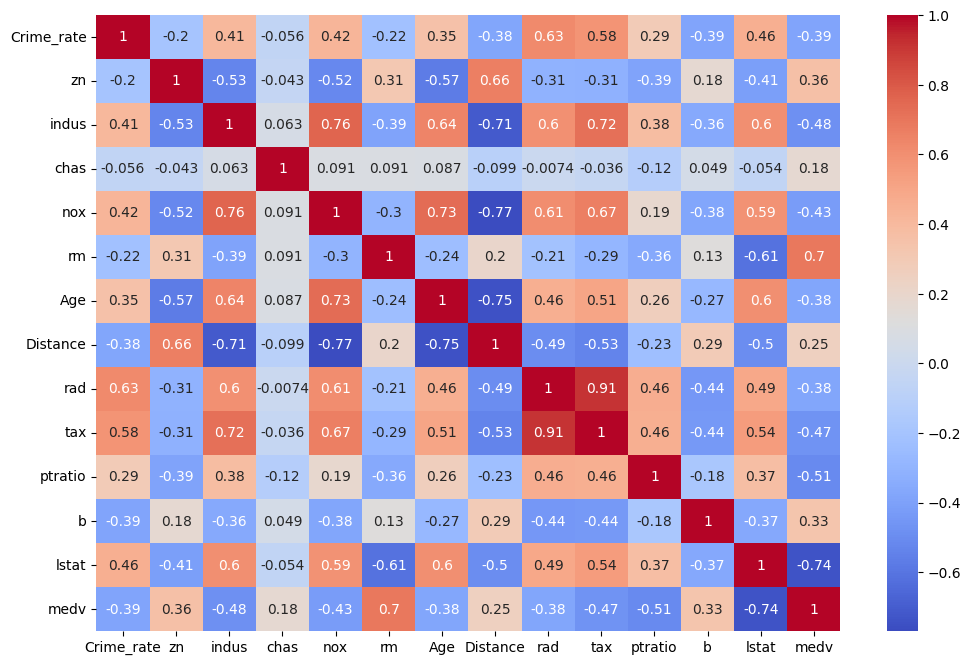

In [88]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
X = df_scaled.drop(columns=['medv'])
y = df_scaled['medv']

In [91]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [94]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.00525509838732644
Root Mean Squared Error: 0.07249205740856332
R² Score: 0.7653745707377421


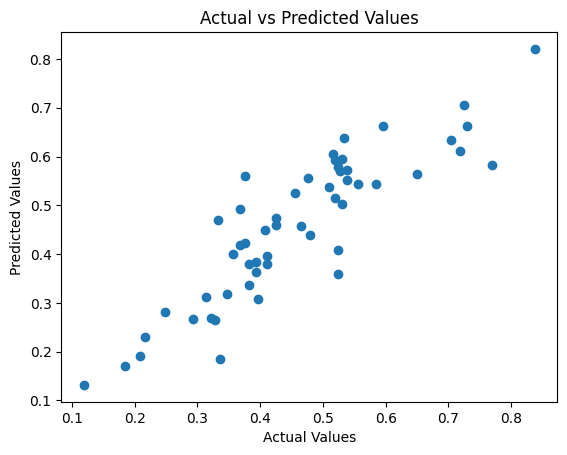

In [95]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()